In [ ]:
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://yadi.sk/d/Yv86Kan3BWoEnQ'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
with open('archive.zip', 'wb') as f:   # Здесь укажите нужный путь к файлу
    f.write(download_response.content)

In [ ]:
import zipfile
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted/")

In [ ]:

import numpy as np
from PIL import Image, ImageDraw

prefix = "drive/MyDrive/"
# prefix = ""

xtrain = np.load("extracted/xtrain.npy").reshape([-1, 256, 256]).astype(int)

np.save(prefix+"xtrain0.npy", xtrain[0:5000])
np.save(prefix+"xtrain1.npy", xtrain[5000:10000])
np.save(prefix+"xtrain2.npy", xtrain[10000:])

xtrain


array([[[ 17,  13,  12, ...,   9,   9,   9],
        [ 17,  14,  12, ...,   9,   9,   9],
        [ 14,  14,  13, ...,   9,   9,   9],
        ...,
        [ 18,  20,  22, ...,  23,  22,  20],
        [ 22,  23,  21, ...,  23,  20,  22],
        [ 22,  22,  20, ...,  20,  21,  21]],

       [[ 51,  58,  65, ...,  28,  34,  36],
        [ 51,  57,  63, ...,  32,  36,  36],
        [ 48,  54,  61, ...,  38,  37,  37],
        ...,
        [ 73,  57,  53, ...,  89,  83, 108],
        [ 72,  57,  51, ..., 123, 120, 123],
        [ 68,  57,  50, ..., 149, 124, 123]],

       [[ 12,  12,  12, ...,  32,  21,  24],
        [ 14,  14,  12, ...,  26,  20,  21],
        [ 15,  15,  14, ...,  23,  20,  21],
        ...,
        [ 12,  11,  12, ...,  57,  56,  55],
        [ 11,  12,  12, ...,  56,  55,  54],
        [ 12,  12,  12, ...,  55,  55,  55]],

       ...,

       [[ 17,  16,  15, ...,   9,   8,   8],
        [ 17,  16,  15, ...,   9,   8,   8],
        [ 16,  15,  15, ...,   9,   8,   8

In [1]:
import numpy as np
from PIL import Image, ImageDraw

prefix = "drive/MyDrive/"
# prefix = ""

fname = prefix + "xtrain2.npy"

xtrain = np.load(fname)

xtrain


array([[[ 36,  35,  32, ...,  14,  12,  13],
        [ 34,  35,  36, ...,  12,  12,  11],
        [ 34,  35,  36, ...,   9,  11,  11],
        ...,
        [ 11,  11,  10, ...,  90,  89,  83],
        [ 12,  11,  12, ...,  98,  77,  84],
        [ 12,  13,  12, ...,  90,  66,  90]],

       [[ 79,  80,  81, ...,  15,  10,   7],
        [ 79,  80,  80, ...,  13,   9,   9],
        [ 79,  79,  79, ...,  11,   8,  11],
        ...,
        [134, 145, 124, ...,  22,  21,  21],
        [122, 156, 140, ...,  24,  24,  24],
        [129, 138, 165, ...,  20,  26,  25]],

       [[ 70,  72,  70, ...,   4,  10,  13],
        [ 68,  73,  73, ...,   3,   7,  14],
        [ 66,  74,  76, ...,   3,   5,  11],
        ...,
        [ 11,  12,  11, ..., 144, 141, 138],
        [ 11,  11,  11, ..., 136, 130, 131],
        [ 11,  11,  11, ..., 137, 130, 121]],

       ...,

       [[ 17,  16,  15, ...,   9,   8,   8],
        [ 17,  16,  15, ...,   9,   8,   8],
        [ 16,  15,  15, ...,   9,   8,   8

In [2]:

import numpy as np
import scipy
from PIL import Image, ImageDraw

Y = np.load("extracted/ytrain.npy")

if fname == prefix+"xtrain0.npy":
  Y = Y[0:5000]
elif fname == prefix+"xtrain1.npy":
  Y = Y[5000:10000]
elif fname == prefix+"xtrain2.npy":
  Y = Y[10000:]

Y[506]


array([0.26918402, 0.10578704, 0.22335069, 0.91672456, 0.7636285 ,
       0.899537  , 0.7080729 , 0.09641204], dtype=float32)

random 4584
[0.25027955 0.02776617 0.20348328 1.0015173  0.8845488  0.9737327
 0.7787173  0.030498  ]


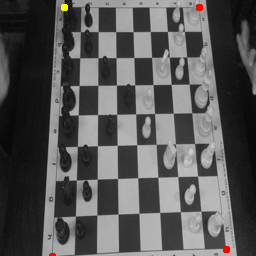

In [3]:
import random
ind = random.randint(0,5000)
print("random", ind)
img = Image.fromarray(np.uint8(np.stack([xtrain[ind]] * 3, axis=-1)), mode='RGB')

print(Y[ind])

imglen = 256
draw = ImageDraw.Draw(img)

for i in range(4):
    x = imglen * Y[ind][i * 2]
    y = imglen * Y[ind][i * 2 + 1]
    draw.ellipse((x - 3, y - 3, x + 3, y + 3), ('red' if i else 'yellow'))
img

In [4]:
import gc

def sobel(x):
    def conv(window):  # 256x256 vs 3x3
        def mul(i, j):
            if (window[i][j]):
                return x[:, i:i + x.shape[1] - window.shape[0] + 1, j:j + x.shape[2] - window.shape[1] + 1] * window[i][
                    j]
            else:
                return np.zeros((x.shape[0], x.shape[1] - window.shape[0] + 1, x.shape[2] - window.shape[1] + 1))

        return sum([mul(i // window.shape[0], i % window.shape[0]) for i in range(9)])

    vert = conv(np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
    hor = conv(np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))

    gradients = ((vert ** 2 + hor ** 2) ** 0.5) / 4
    gradients =  gradients > 32

    del vert
    del hor
    gc.collect()
    return gradients



random 3987


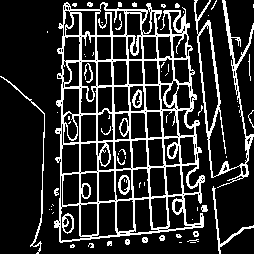

In [5]:
ind = random.randint(0, 5000)
print("random", ind)
sz = 10
x_sobel = sobel(xtrain[ind:ind + sz])
Image.fromarray(np.uint8(np.stack([255 * x_sobel[0]] * 3, axis=-1)), mode='RGB')

In [6]:
import math

cross_line_width = 2
cross_side_length = 15
cross_size = cross_side_length * 2 + cross_line_width

def gen_cross(size,line_width,angle, imglen, hv):
  cross = np.zeros((imglen, imglen))

  if hv == 'v':
    cross[0:size, 0:size] -= 0.1
    mid = size // 2
    sin = math.sin(angle)
    for i in range(mid):
      dy = mid - i
      dx = int(sin * dy)
      sign = 1 if dx > 0 else -1
      
      cross[i][mid+dx-sign] = 0
      cross[i][mid+dx] = 1.0
      cross[i][mid+dx+sign] = 1.0
      cross[i][mid+dx+2*sign] = 0


      cross[size-1-i][size-1-mid-dx+sign] = 0
      cross[size-1-i][size-1-mid-dx] = 1.0
      cross[size-1-i][size-1-mid-dx-sign] = 1.0
      cross[size-1-i][size-1-mid-dx-2*sign] = 0
    return cross

  if hv == 'h':
    subcross = gen_cross(size,line_width,angle,imglen,'v')[0:size,0:size].T[:,::-1]
    cross[0:size, 0:size] = subcross
    return cross

  

print("a fragment of an example of a vertical line mask:")
cross = gen_cross(cross_size, cross_line_width, math.acos(-1)*random.randint(85,95)/90, 254, 'v')
for i in range(cross_size):
  print(cross[0:cross_size, cross_size//2-3:cross_size//2+4][i])

  
v_crosses = [gen_cross(cross_size, cross_line_width, math.acos(-1)*i/90, 254, 'v') for i in np.arange(85,96,1)]
h_crosses = [gen_cross(cross_size, cross_line_width, math.acos(-1)*i/90, 254, 'h') for i in np.arange(85,96,1)]

crosses = v_crosses + h_crosses

dft2 = [np.fft.fft2(cross) for cross in crosses]

E = np.zeros([254, 254])
E[0:cross_size, 0:cross_size] = 1.0
dftE = np.fft.fft2(E)
dftE_stacked = np.tile(dftE, (1, 1, 1))
dftE_stacked = np.conjugate(dftE_stacked)
dft2_stacked = [np.conjugate(np.tile(x, (1,1,1))) for x in dft2]
dft2_stacked = np.stack(dft2_stacked)

yy = np.stack([(cross ** 2).sum() ** 0.5 for cross in crosses]).reshape(-1,1,1,1)

dft2_stacked.shape


a fragment of an example of a vertical line mask:
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0.  -0.1 -0.1]
[-0.1  0.   1.   1.   0. 

(22, 1, 254, 254)

In [7]:
import matplotlib.pyplot as plt

def fft_ind(x,a,b):
  dft1 = np.tile(np.fft.fft2(x), (b-a, 1, 1, 1))
  dft1sq = np.tile(np.fft.fft2(x ** 2), (b-a, 1, 1, 1)) 

  xx = np.fft.ifft2(dft1sq * dftE_stacked).real ** 0.5
  xy = np.fft.ifft2(dft1 * dft2_stacked[a:b]).real

  xy = xy / xx / yy[a:b]

  xy = np.nan_to_num(xy,nan = -1.0, posinf=-1.0, neginf=-1.0)
  xy = (xy > 0) * xy

  xx = None
  x2 = None
  gc.collect()

  return np.amax(xy, axis = 0)

def autocor(x):
    fft = np.fft.fft2(x)
    conv = np.fft.ifft2(fft * np.conjugate(fft))
    norm = conv[:,0:1,0:1]
    return (conv/norm).real

random 874


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


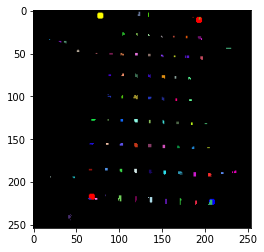

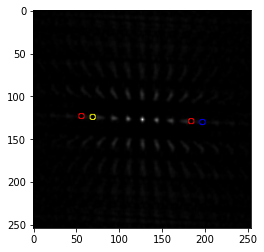

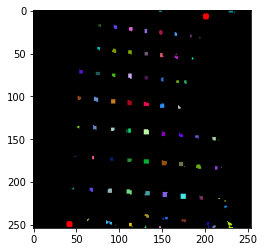

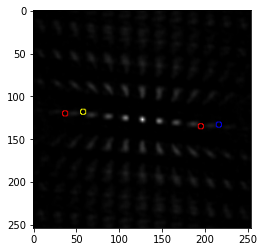

In [8]:
np.set_printoptions(suppress=True)
ind = random.randint(0, 5000)
#ind = 1073
#ind = 1496
print("random", ind)

treshold = 0.1

sz = 2

x_fft_v = fft_ind(sobel(xtrain[ind:ind + sz]), 0, len(v_crosses))
x_fft_h = fft_ind(sobel(xtrain[ind:ind + sz]), len(v_crosses), len(v_crosses) + len(h_crosses))

#x_sum = (x_fft_v + x_fft_h) / 2.0

x_fft_v = x_fft_v > treshold  # vertical lines
x_fft_h = x_fft_h > treshold  # horizontal lines

x_fft = x_fft_v * x_fft_h

tube_autocor = autocor(x_fft)

for i in range(sz):
    #img1 = Image.fromarray(np.uint8(np.stack([255 * (x_fft_v[i])] * 3, axis=-1)), mode='RGB')

    #img2 = Image.fromarray(np.uint8(np.stack([255 * (x_fft_h[i])] * 3, axis=-1)), mode='RGB')

    #img3 = Image.fromarray(np.uint8(np.stack([255 * (x_sum[i])] * 3, axis=-1)), mode='RGB')
    
    img4 = Image.fromarray(np.uint8(np.stack([255 * (x_fft[i])] * 3, axis=-1)), mode='RGB')

    #plt.figure()
    #plt.imshow(img1)

    #plt.figure()
    #plt.imshow(img2)

    imglen = 256
    draw = ImageDraw.Draw(img4)

    clrs = ['yellow', 'red', 'blue', 'red']
    for j in range(4):
        x = imglen * Y[ind + i][j * 2] + 1 - cross_size // 2  # 1 за собеля и половина креста
        y = imglen * Y[ind + i][j * 2 + 1] + 1 - cross_size // 2
        draw.ellipse((x - 3, y - 3, x + 3, y + 3), clrs[j])

    points = np.transpose(x_fft[i].nonzero())

    from sklearn.cluster import AgglomerativeClustering

    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=3, linkage='single').fit_predict(points)

    rnd_clr = []

    rnd_clr = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for x in
               range(1 + max(clustering))]

    for j in range(len(clustering)):
        [y, x] = points[j]
        draw.point((x, y), rnd_clr[clustering[j]])

    plt.figure()
    plt.imshow(img4)

    img6 = Image.fromarray(np.uint8(np.stack([255 * (np.roll(tube_autocor[i], (254//2, 254//2), (0,1)))] * 3, axis=-1)), mode='RGB')
    draw = ImageDraw.Draw(img6)

    def add_pair_of_points(i1, i2, draw):
      p1 = Y[ind+i][i1*2:i1*2+2]
      p2 = Y[ind+i][i2*2:i2*2+2]
      mid_point_vector = 0.5 - ((p1+p2)/2.0)
      p1 = (p1 + mid_point_vector) * 256 - 1
      p2 = (p2 + mid_point_vector) * 256 - 1
      draw.ellipse((p1[0]-3, p1[1]-3, p1[0]+3, p1[1]+3), False, clrs[i1])
      draw.ellipse((p2[0]-3, p2[1]-3, p2[0]+3, p2[1]+3), False, clrs[i2])

    add_pair_of_points(0, 3, draw)
    add_pair_of_points(1, 2, draw)

    
    plt.figure()
    plt.imshow(img6)

    left_lim = 5
    right_lim = 20

 

In [9]:
def get_points_and_lines(x, mode):
  treshold = 0.1

  sob = sobel(x)

  x_fft_v = fft_ind(sob, 0, len(v_crosses))
  x_fft_h = fft_ind(sob, len(v_crosses), len(v_crosses)+len(h_crosses))

  x_fft_v = x_fft_v > treshold # vertical lines
  x_fft_h = x_fft_h > treshold # horizontal lines

  x_fft = x_fft_v * x_fft_h

  x_fft_v = None
  x_fft_h = None
  sob = None
  gc.collect()

  if mode == "points":
    return x_fft.astype(bool)
  elif mode == "autocorrelation":
    return autocor(x_fft)



In [ ]:
step = 100
gc.collect()
for i in range(0,len(Y),step):
  print(i)
  x = xtrain[i:i+step]
  p = get_points_and_lines(x, "autocorrelation")
  np.save("autocor_%s_%d.npy"%(fname[-5], i), p)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100


In [ ]:
import numpy as np
#выполняю трижды
prefix = "drive/MyDrive/"
#x_train = np.concatenate([np.load("autocor_0_%d.npy" % i) for i in range(0, 5000, 100)])
#x_train = np.concatenate([np.load("autocor_1_%d.npy" % i) for i in range(0, 5000, 100)])
x_train = np.concatenate([np.load("autocor_2_%d.npy" % i) for i in range(0, 5200, 100)])
np.save(prefix + "autocor2.npy", x_train)

In [1]:
import numpy as np
import gc
prefix = "drive/MyDrive/"
x_train = np.concatenate([
                          np.load(prefix+"autocor0.npy")[:, 0:254//2],
                          np.load(prefix+"autocor1.npy")[:, 0:254//2],
                          np.load(prefix+"autocor2.npy")[:, 0:254//2]
                          #выбросил половину потому что автокорреляция симметрична
                        ])
gc.collect()
x_train.shape

(15137, 127, 254)

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

Y = np.load("extracted/ytrain.npy")

X = x_train.reshape((len(x_train),-1))
y1 = Y[:,4:6] - Y[:,2:4]
y2 = Y[:,4:6] - Y[:,6:8]
y3 = Y[:,6:8] - Y[:,0:2]
y = np.concatenate((y1,y2,y3),axis = 1)

print(X.shape, y.shape)

end = 13100

model = Lasso(alpha=0.0000005)
model.fit(X[:end], y[:end])

y_pred = model.predict(X[end:])

mse = np.average((y_pred-y[end:])**2)
mse


(15137, 32258) (15137, 6)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1880747437800953, tolerance: 0.004832305053231559
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.045826852618114616, tolerance: 0.0015403417022363045
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07343637406329534, tolerance: 0.0009306568078177172
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

3.966304299484976e-05

In [4]:
coefs = model.coef_
intercept = model.intercept_
np.save("coefs.npy", coefs)
np.save("intercept.npy", intercept)

In [11]:
from sklearn.linear_model import Lasso
coefs = np.load("coefs.npy")
intercept = np.load("intercept.npy")
model = Lasso(alpha=0.0000005)
model.coef_ = coefs
model.intercept_ = intercept

random  3928


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(10, 6) (10, 6)
mse 0:2  2.7829158844155542e-05
mse 2:4  1.605651339574804e-05
mse 4:6  1.1582493707052869e-05


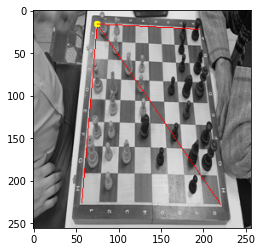

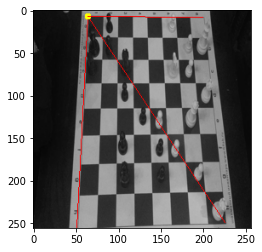

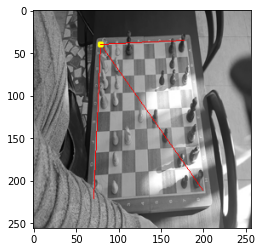

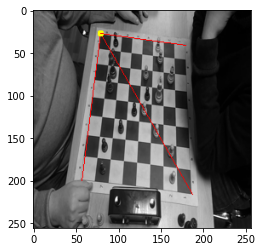

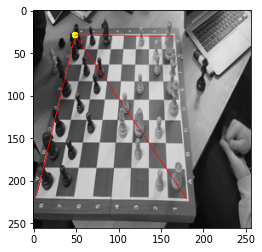

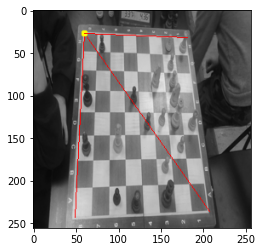

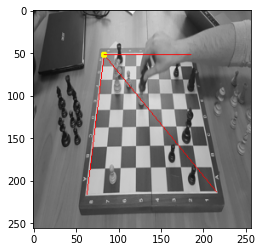

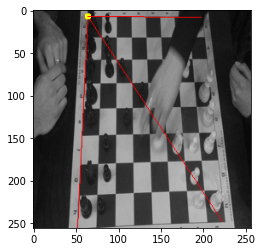

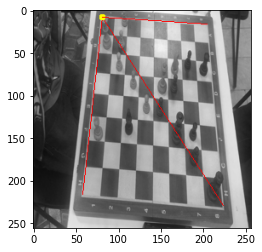

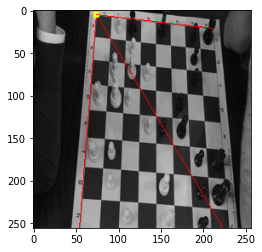

In [14]:


import matplotlib.pyplot as plt

sz = 10
ind = random.randint(3100, 5100-sz)
print("random ", ind)

X = xtrain[ind:ind+sz]
X = get_points_and_lines(X, "autocorrelation")
X = X[:, 0:254//2]
X = np.reshape(X, (len(X), -1))
y_pred = model.predict(X)

y1 = Y[ind:ind+sz,4:6] - Y[ind:ind+sz,2:4]
y2 = Y[ind:ind+sz,4:6] - Y[ind:ind+sz,6:8]
y3 = Y[ind:ind+sz,6:8] - Y[ind:ind+sz,0:2]
y = np.concatenate((y1,y2,y3),axis = 1)
print(y.shape, y_pred.shape)
print("mse 0:2 ", np.average((y[:,0:2] - y_pred[:,0:2])**2))
print("mse 2:4 ", np.average((y[:,2:4] - y_pred[:,2:4])**2))
print("mse 4:6 ", np.average((y[:,4:6] - y_pred[:,4:6])**2))

for i in range(sz):
  img = Image.fromarray(np.uint8(np.stack([xtrain[ind+i]] * 3, axis=-1)), mode='RGB')


  imglen = 256
  draw = ImageDraw.Draw(img)

  x = imglen * Y[ind+i][0]
  y = imglen * Y[ind+i][1]
  draw.ellipse((x - 3, y - 3, x + 3, y + 3), 'yellow')
  x1 = x + imglen * (-y_pred[i][0] + (y_pred[i][2] + y_pred[i][4]))
  y1 = y + imglen * (-y_pred[i][1] + (y_pred[i][3] + y_pred[i][5]))
  draw.line((x,y,x1,y1), 'red')

  x = imglen * Y[ind+i][0]
  y = imglen * Y[ind+i][1]
  draw.ellipse((x - 3, y - 3, x + 3, y + 3), 'yellow')
  x1 = x + imglen * (y_pred[i][2] + y_pred[i][4])
  y1 = y + imglen * (y_pred[i][3] + y_pred[i][5])
  draw.line((x,y,x1,y1), 'red')

  x = imglen * Y[ind+i][0]
  y = imglen * Y[ind+i][1]
  draw.ellipse((x - 3, y - 3, x + 3, y + 3), 'yellow')
  x1 = x + imglen * y_pred[i][4]
  y1 = y + imglen * y_pred[i][5]
  draw.line((x,y,x1,y1), 'red')
  
  plt.figure()
  plt.imshow(img)

